Mean Squared Error: 904369595.7473949


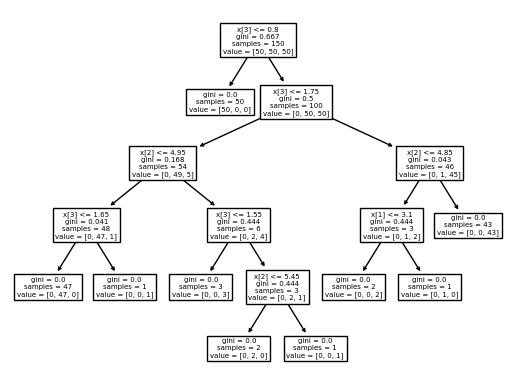

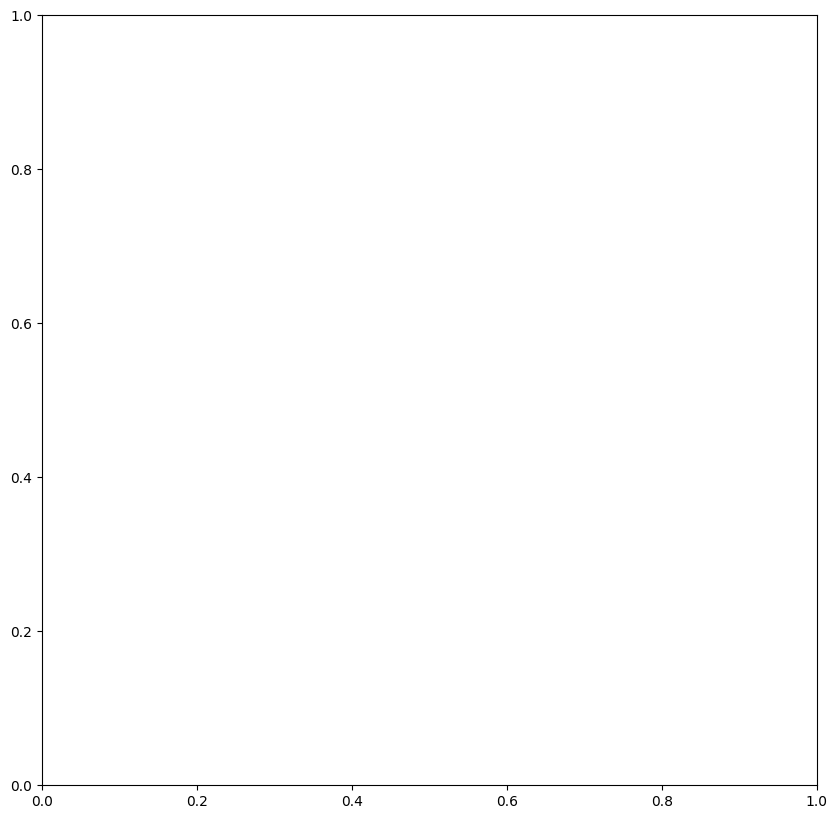

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data/clean_data.csv')

# Select relevant features
numerical_features = ['Rating', 'Founded', 'Revenue']
categorical_features = ['Size', 'Type of ownership', 'Sector', 'State']

# Remove rows with missing values in the target or features 
data = data[['Avg_Salary'] + numerical_features + categorical_features].dropna()

# Split the data into features (X) and target variable (y)
X = data[numerical_features + categorical_features]
y = data['Avg_Salary']

# Define the preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Combine the preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the decision tree regressor with the preprocessor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor()) 
])

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse) 

clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf)

# Plot the decision tree
fig, ax = plt.subplots(figsize=(10, 10))
# Show the plot
plt.show()